# SPR Data analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
color = sns.color_palette()

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


**Dataset Size:**

First let us check the number of rows in train and test file :
- Number of rows in train :  13'647309
- Number of rows in test :  929615
- Number of clients (train dataset) : 956645

**Dataset columns:**
  
  
Main columns :   

- fecha_dato 	The table is partitioned for this column
- ncodpers 	Customer code
- ind_empleado 	Employee index: A active, B ex employed, F filial, N not employee, P pasive
- pais_residencia 	Customer's Country residence
- sexo 	Customer's sex
- age 	Age
- fecha_alta 	The date in which the customer became as the first holder of a contract in the bank
- ind_nuevo 	New customer Index. 1 if the customer registered in the last 6 months.
- antiguedad 	Customer seniority (in months)
- indrel 	1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)
- ult_fec_cli_1t 	Last date as primary customer (if he isn't at the end of the month)
- indrel_1mes 	Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)
- tiprel_1mes 	Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)
- indresi 	Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)
- indext 	Foreigner index (S (Yes) or N (No) if the customer's birth country is different than the bank country)
- conyuemp 	Spouse index. 1 if the customer is spouse of an employee
- canal_entrada 	channel used by the customer to join
- indfall 	Deceased index. N/S
- tipodom 	Addres type. 1, primary address
- cod_prov 	Province code (customer's address)
- nomprov 	Province name
- ind_actividad_cliente 	Activity index (1, active customer; 0, inactive customer)
- renta 	Gross income of the household
- segmento 	segmentation: 01 - VIP, 02 - Individuals 03 - college graduated    
    
    
target columns : 
    
- ind_ahor_fin_ult1 	Saving Account
- ind_aval_fin_ult1 	Guarantees
- ind_cco_fin_ult1 	Current Accounts
- ind_cder_fin_ult1 	Derivada Account
- ind_cno_fin_ult1 	Payroll Account
- ind_ctju_fin_ult1 	Junior Account
- ind_ctma_fin_ult1 	Más particular Account
- ind_ctop_fin_ult1 	particular Account
- ind_ctpp_fin_ult1 	particular Plus Account
- ind_deco_fin_ult1 	Short-term deposits
- ind_deme_fin_ult1 	Medium-term deposits
- ind_dela_fin_ult1 	Long-term deposits
- ind_ecue_fin_ult1 	e-account
- ind_fond_fin_ult1 	Funds
- ind_hip_fin_ult1 	    Mortgage
- ind_plan_fin_ult1 	Pensions
- ind_pres_fin_ult1 	Loans
- ind_reca_fin_ult1 	Taxes
- ind_tjcr_fin_ult1 	Credit Card
- ind_valo_fin_ult1 	Securities
- ind_viv_fin_ult1 	Home Account
- ind_nomina_ult1 	Payroll
- ind_nom_pens_ult1 	Pensions
- ind_recibo_ult1 	Direct Debit    
    

In [2]:
TARGET_LABELS = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']

#TARGET_LABELS = [column for column in train.columns if column.endswith('ult1')]

## Data stats: data per month representations

In [3]:
data_path = "data/"
train = pd.read_csv(data_path+"train_ver2.csv", usecols=['fecha_dato', 'ncodpers'], parse_dates=['fecha_dato'])

Number of clients

In [4]:
len(train['ncodpers'].unique())

956645

Setup month start/end row indices

In [5]:
gb = train.groupby('fecha_dato')
data_count_per_month = gb.agg('size')

In [6]:
month_start_end_row_indices = {}
for key, group_value in gb:
    month_start_end_row_indices[key] = [group_value.index[0], group_value.index[-1]]
    
month_start_end_row_indices    

{Timestamp('2015-01-28 00:00:00'): [0, 625456],
 Timestamp('2015-02-28 00:00:00'): [625457, 1252850],
 Timestamp('2015-03-28 00:00:00'): [1252851, 1882059],
 Timestamp('2015-04-28 00:00:00'): [1882060, 2512426],
 Timestamp('2015-05-28 00:00:00'): [2512427, 3144383],
 Timestamp('2015-06-28 00:00:00'): [3144384, 3776493],
 Timestamp('2015-07-28 00:00:00'): [3776494, 4606310],
 Timestamp('2015-08-28 00:00:00'): [4606311, 5449511],
 Timestamp('2015-09-28 00:00:00'): [5449512, 6314951],
 Timestamp('2015-10-28 00:00:00'): [6314952, 7207202],
 Timestamp('2015-11-28 00:00:00'): [7207203, 8113311],
 Timestamp('2015-12-28 00:00:00'): [8113312, 9025332],
 Timestamp('2016-01-28 00:00:00'): [9025333, 9941601],
 Timestamp('2016-02-28 00:00:00'): [9941602, 10862505],
 Timestamp('2016-03-28 00:00:00'): [10862506, 11787581],
 Timestamp('2016-04-28 00:00:00'): [11787582, 12715855],
 Timestamp('2016-05-28 00:00:00'): [12715856, 13647308]}

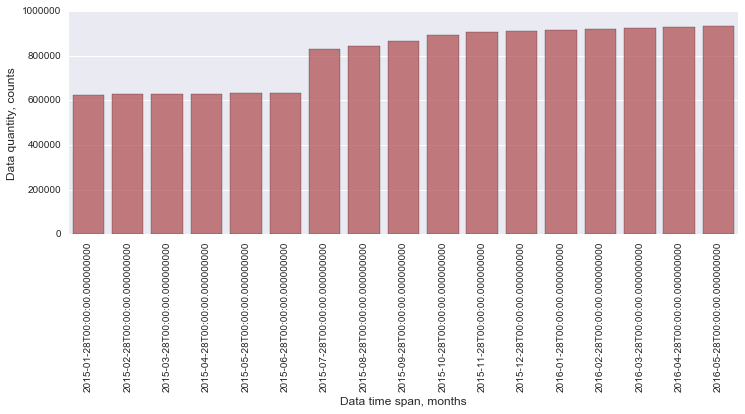

In [7]:
plt.figure(figsize=(12,4))

#values = np.log((data_count_per_month.values - np.min(data_count_per_month.values)) + 1)
values = data_count_per_month.values

sns.barplot(data_count_per_month.index, values, alpha=0.8, color=color[2])
plt.ylabel('Data quantity, counts', fontsize=12)
plt.xlabel('Data time span, months', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
del train
del gb

### Analyse a month

Read a month

In [9]:
month_key=pd.Timestamp('2015-01-28 00:00:00')

In [10]:
skiprows = month_start_end_row_indices[month_key][0]
nrows = month_start_end_row_indices[month_key][1] - skiprows + 1
train_month = pd.read_csv(data_path+"train_ver2.csv", skiprows=range(1, skiprows+1), nrows=nrows)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
month_full_stats = train_month.describe()
month_full_stats

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ncodpers,ind_nuevo,indrel,indrel_1mes,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,6.254570e+05,618504.000000,618504.000000,618504.000000,618504.0,614826.000000,618504.000000,5.138790e+05,625457.000000,625457.000000,...,625457.000000,625457.000000,625457.000000,625457.000000,625457.000000,625457.000000,625457.000000,622346.000000,622346.000000,625457.000000
mean,7.763354e+05,0.000296,1.120895,1.000095,1.0,26.669173,0.537777,1.345990e+05,0.000141,0.000030,...,0.008005,0.011879,0.003756,0.061216,0.056939,0.032397,0.005171,0.062658,0.069625,0.152850
std,4.055675e+05,0.017198,3.439928,0.013753,0.0,12.676776,0.498571,2.257587e+05,0.011861,0.005512,...,0.089114,0.108343,0.061168,0.239726,0.231727,0.177053,0.071721,0.242347,0.254515,0.359843
min,1.588900e+04,0.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.202730e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.137720e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
50%,8.739230e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
75%,1.133417e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
max,1.379131e+06,1.000000,99.000000,3.000000,1.0,52.000000,1.000000,2.889440e+07,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
print train_month.columns.values[11], train_month.columns.values[15]

indrel_1mes conyuemp


In [13]:
train_month["fecha_dato"] = pd.to_datetime(train_month["fecha_dato"],format="%Y-%m-%d")
train_month["fecha_alta"] = pd.to_datetime(train_month["fecha_alta"],format="%Y-%m-%d")
train_month["age"] = pd.to_numeric(train_month["age"], errors="coerce")

In [14]:
train_month.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                       True
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

In [15]:
string_data = train_month.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for ind_empleado:
['N' nan 'A' 'B' 'F' 'S']

Unique values for pais_residencia:
['ES' nan 'CA' 'CH' 'CL' 'IE' 'AT' 'NL' 'FR' 'GB' 'DE' 'DO' 'BE' 'AR' 'VE'
 'US' 'MX' 'BR' 'IT' 'EC' 'PE' 'CO' 'HN' 'FI' 'SE' 'AL' 'PT' 'MZ' 'CN' 'TW'
 'PL' 'IN' 'CR' 'NI' 'HK' 'AD' 'CZ' 'AE' 'MA' 'GR' 'PR' 'RO' 'IL' 'RU' 'GT'
 'GA' 'NO' 'SN' 'MR' 'UA' 'BG' 'PY' 'EE' 'SV' 'ET' 'CM' 'SA' 'CI' 'QA' 'LU'
 'PA' 'BA' 'BO' 'AU' 'BY' 'KE' 'SG' 'HR' 'MD' 'SK' 'TR' 'AO' 'CU' 'GQ' 'EG'
 'ZA' 'DK' 'UY' 'GE' 'TH' 'DZ' 'LB' 'JP' 'NG' 'PK' 'TN' 'TG' 'KR' 'GH' 'RS'
 'VN' 'PH' 'KW' 'NZ' 'MM' 'KH' 'GI' 'SL' 'GN' 'GW' 'OM' 'CG' 'LV' 'LT' 'ML'
 'MK' 'HU' 'IS' 'LY' 'CF' 'GM' 'KZ' 'CD' 'BZ']

Unique values for sexo:
['H' 'V' nan]

Unique values for ult_fec_cli_1t:
[nan '2015-07-02' '2015-07-23' '2015-07-06' '2015-07-30' '2015-07-20'
 '2015-07-08' '2015-07-22' '2015-07-17' '2015-07-09' '2015-07-03'
 '2015-07-29' '2015-07-13' '2015-07-21' '2015-07-27' '2015-07-14'
 '2015-07-01' '2015-07-24' '2015-07-15' '2015-07-16'

### Load test dataset

In [16]:
#data_path = "data/"
#test = pd.read_csv(data_path+"test_ver2.csv")

### Data Cleaning

In [16]:
df = train_month
#df = test

There are some 'unknown' users in train dataset only

In [17]:
print np.sum(df['sexo'].isnull()), np.sum(df['pais_residencia'].isnull()), np.sum(df['ind_empleado'].isnull()), np.sum(df['age'].isnull()), np.sum(df['fecha_alta'].isnull())


6955 6953 6953 6953 6953


In [18]:
unknown_users = df['sexo'].isnull() & df['age'].isnull() & df['ind_empleado'].isnull() & df['fecha_alta'].isnull() & df['pais_residencia'].isnull()

In [19]:
np.sum(unknown_users)

6953

In [20]:
df[unknown_users].head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,2015-01-28,1050741,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,NaN,NaN,NaN,NaN,NaT,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0


In [21]:
df[unknown_users][TARGET_LABELS].tail()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
625112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,NaN,NaN,0
625150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,NaN,NaN,0
625268,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
625307,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
625374,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


**Remove these users** !

In [22]:
df.drop(df[unknown_users].index, inplace=True)

In [23]:
unknown_users = df['sexo'].isnull() & df['age'].isnull() & df['ind_empleado'].isnull() & df['fecha_alta'].isnull() & df['pais_residencia'].isnull()
np.sum(unknown_users)

0

In [24]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
nomprov                   True
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

Start with gender -> replace nan with UNKNOWN

In [25]:
df['sexo'].unique()

array(['H', 'V', nan], dtype=object)

In [26]:
df.loc[df['sexo'].isnull(),'sexo'] = "UNKNOWN"

In [27]:
df['sexo'].unique()

array(['H', 'V', 'UNKNOWN'], dtype=object)

In [28]:
df['sexo'].value_counts()

V          339272
H          279230
UNKNOWN         2
Name: sexo, dtype: int64

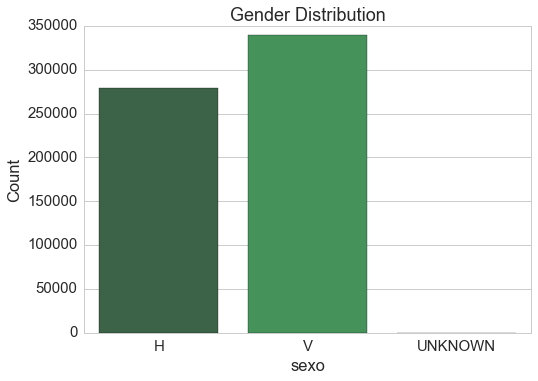

In [29]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.countplot(x="sexo", 
                  data=df, 
                  palette="Greens_d");
    sns.plt.title("Gender Distribution")
    plt.ylabel("Count")

Continue with age -> replace nan with mean , less 18 -> mean between 18, 30 and greater than 90 -> mean between 30, 90

In [30]:
df['age'].unique()

array([  35.,   23.,   22.,   24.,   65.,   28.,   25.,   26.,   53.,
         27.,   32.,   37.,   31.,   39.,   63.,   33.,   55.,   42.,
         58.,   38.,   50.,   30.,   45.,   44.,   36.,   29.,   60.,
         57.,   67.,   47.,   34.,   48.,   46.,   54.,   84.,   15.,
         12.,    8.,    6.,   83.,   40.,   77.,   69.,   52.,   59.,
         43.,   10.,    9.,   49.,   41.,   51.,   78.,   16.,   11.,
         73.,   62.,   66.,   17.,   68.,   82.,   95.,   96.,   56.,
         61.,   79.,   72.,   14.,   19.,   13.,   86.,   64.,   20.,
         89.,   71.,    7.,   70.,   74.,   21.,   18.,   75.,    4.,
         80.,   81.,    5.,   76.,   92.,   93.,   85.,   91.,   87.,
         90.,   94.,   99.,   98.,   88.,   97.,  100.,  101.,  106.,
        103.,    3.,    2.,  102.,  104.,  111.,  107.,  109.,  105.,
        112.,  115.,  110.,  116.,  108.,  113.])

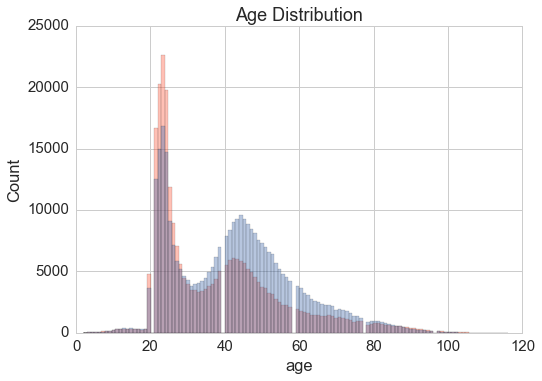

In [31]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df[df['sexo'] == "H"]["age"].dropna(),
                 bins=120,
                 kde=False,
                 color="tomato")
    sns.distplot(df[df['sexo'] == "V"]["age"].dropna(),
                 bins=120,
                 kde=False)
    sns.distplot(df[df['sexo'] == "UNKNOWN"]["age"].dropna(),
                 bins=120,
                 kde=False,
                 color="green")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

In [32]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 90,"age"] = df.loc[(df.age >= 30) & (df.age <= 90),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"] = df["age"].astype(int)

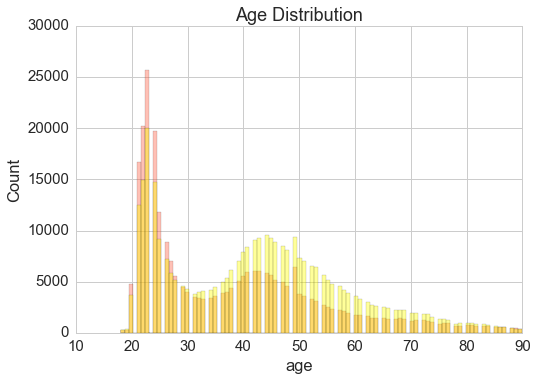

In [33]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df[df['sexo'] == "H"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color="tomato")
    sns.distplot(df[df['sexo'] == "V"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color='yellow')
    sns.distplot(df[df['sexo'] == "UNKNOWN"]["age"].dropna(),
                 bins=100,
                 kde=False,
                 color="green")
    sns.plt.title("Age Distribution")
    plt.ylabel("Count")

Next `ind_empleado` : nan -> UNKNOWN

In [34]:
df['ind_empleado'].unique()

array(['N', 'A', 'B', 'F', 'S'], dtype=object)

In [35]:
df['ind_empleado'].fillna("UNKNOWN",inplace=True)

In [36]:
df['ind_empleado'].unique()

array(['N', 'A', 'B', 'F', 'S'], dtype=object)

In [37]:
df['ind_empleado'].value_counts()

N    618024
B       194
A       144
F       141
S         1
Name: ind_empleado, dtype: int64

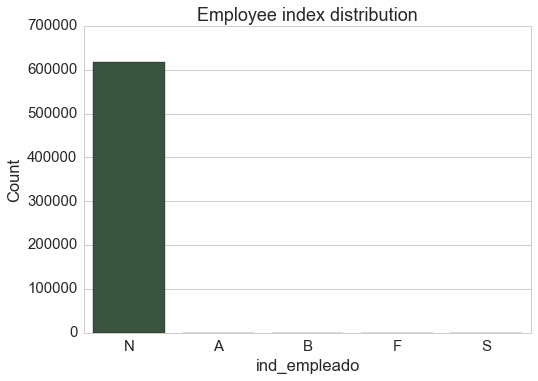

In [38]:
with sns.plotting_context("notebook", font_scale=1.5):
    sns.set_style("whitegrid")
    sns.countplot(x="ind_empleado", 
                  data=df, 
                  palette="Greens_d");
    sns.plt.title("Employee index distribution")
    plt.ylabel("Count")

Next `pais_residencia` : nan -> UNKNOWN

In [39]:
df['pais_residencia'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT',
       'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET', 'CM',
       'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE', 'SG',
       'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK', 'UY',
       'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR', 'GH',
       'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN', 'GW',
       'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF', 'GM',
       'KZ', 'CD', 'BZ'], dtype=object)

In [40]:
df['pais_residencia'].fillna('UNKNOWN', inplace=True)

In [41]:
df['pais_residencia'].unique()

array(['ES', 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE', 'DO',
       'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO', 'HN',
       'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR', 'NI',
       'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU', 'GT',
       'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET', 'CM',
       'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE', 'SG',
       'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK', 'UY',
       'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR', 'GH',
       'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN', 'GW',
       'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF', 'GM',
       'KZ', 'CD', 'BZ'], dtype=object)

In [42]:
df['pais_residencia'].value_counts()

ES    614825
FR       288
AR       275
DE       257
GB       254
CO       201
US       196
RO       168
IT       160
MX       143
BR       132
VE       130
EC       125
CH       112
BO        83
BE        83
PY        79
PT        77
CL        56
PE        50
RU        44
CU        44
NL        43
PL        32
CN        32
SE        32
UY        30
UA        29
AT        28
BG        28
       ...  
TW         2
GW         2
VN         2
ET         2
MZ         2
EE         2
BA         2
LT         2
MM         1
LY         1
ML         1
LV         1
KZ         1
OM         1
GE         1
KH         1
IS         1
HU         1
GH         1
GI         1
GM         1
CD         1
SL         1
CF         1
BZ         1
KW         1
AL         1
TG         1
TN         1
LB         1
Name: pais_residencia, dtype: int64

Next `fecha_alta` : 

In [43]:
df['fecha_alta'].isnull().sum()

0

In [44]:
## something in the middle of the pack
# dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
# median_date = int(np.median(dates.index.values))
# df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
# df["fecha_alta"].describe()

#### Display number of customers joined per year/month 

In [45]:
to_yearmonth = lambda x: int(100 * x.year + x.month)
yearmonth = df['fecha_alta'].apply(to_yearmonth)

('Minimum value of fecha_alta : ', 199501)
('Maximum value of fecha_alta : ', 201501)


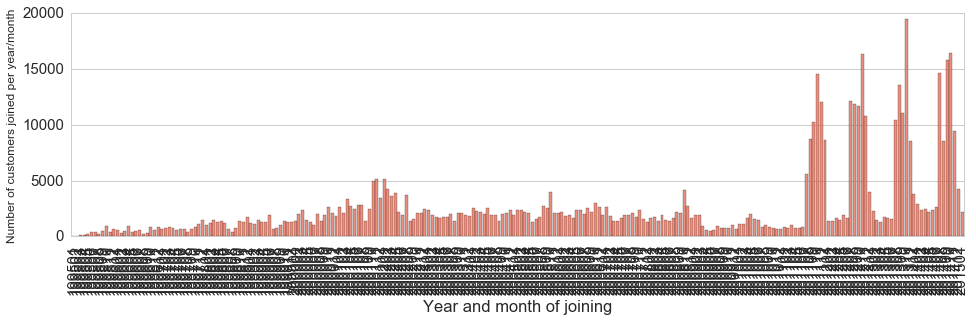

In [46]:
yearmonth_counts = yearmonth.value_counts()
print("Minimum value of fecha_alta : ", min(yearmonth_counts.index))
print("Maximum value of fecha_alta : ", max(yearmonth_counts.index))

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.barplot(yearmonth_counts.index, yearmonth_counts.values, 
                  alpha=0.8, 
                  color='tomato');
    plt.xlabel("Year and month of joining")
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of customers joined per year/month', fontsize=12)

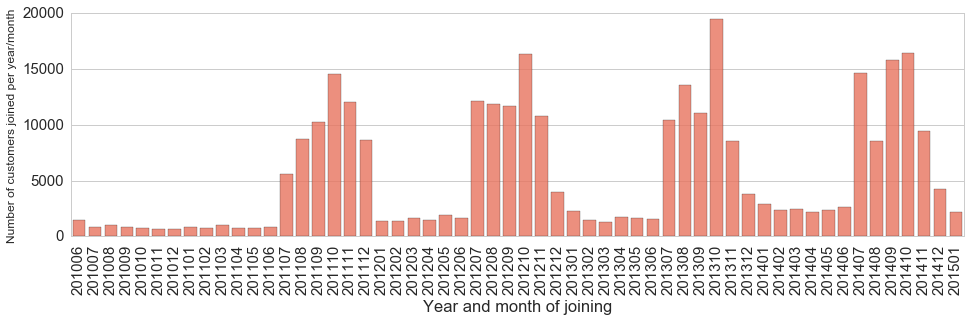

In [47]:
zoom_yearmonth_counts = yearmonth_counts.sort_index()
zoom_yearmonth_counts = zoom_yearmonth_counts[185:]

with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.barplot(zoom_yearmonth_counts.index, zoom_yearmonth_counts.values, 
                  alpha=0.8, 
                  color='tomato');
    plt.xlabel("Year and month of joining")
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of customers joined per year/month', fontsize=12)

Next `ult_fec_cli_1t` (Last date as primary customer (if he isn't at the end of the month)) : nan -> UNKNOWN

In [48]:
print df['ult_fec_cli_1t'].isnull().sum(), df['ult_fec_cli_1t'].shape

617741 (618504,)


In [49]:
df['ult_fec_cli_1t'].unique()

array([nan, '2015-07-02', '2015-07-23', '2015-07-06', '2015-07-30',
       '2015-07-20', '2015-07-08', '2015-07-22', '2015-07-17',
       '2015-07-09', '2015-07-03', '2015-07-29', '2015-07-13',
       '2015-07-21', '2015-07-27', '2015-07-14', '2015-07-01',
       '2015-07-24', '2015-07-15', '2015-07-16', '2015-07-28',
       '2015-07-07', '2015-07-10'], dtype=object)

In [50]:
df['ult_fec_cli_1t'].fillna('UNKNOWN', inplace=True)

In [51]:
df['ult_fec_cli_1t'].unique()

array(['UNKNOWN', '2015-07-02', '2015-07-23', '2015-07-06', '2015-07-30',
       '2015-07-20', '2015-07-08', '2015-07-22', '2015-07-17',
       '2015-07-09', '2015-07-03', '2015-07-29', '2015-07-13',
       '2015-07-21', '2015-07-27', '2015-07-14', '2015-07-01',
       '2015-07-24', '2015-07-15', '2015-07-16', '2015-07-28',
       '2015-07-07', '2015-07-10'], dtype=object)

Next `conyuemp` (Spouse index. 1 if the customer is spouse of an employee) : nan -> UNKNOWN

In [52]:
print df['conyuemp'].isnull().sum(), df['conyuemp'].shape

618415 (618504,)


In [53]:
df['conyuemp'].unique()

array([nan, 'N', 'S'], dtype=object)

In [54]:
df['conyuemp'].fillna('UNKNOWN', inplace=True)

In [55]:
df['conyuemp'].unique()

array(['UNKNOWN', 'N', 'S'], dtype=object)

In [56]:
df['conyuemp'].value_counts()

UNKNOWN    618415
N              88
S               1
Name: conyuemp, dtype: int64

Next `canal_entrada` (channel used by the customer to join) : nan -> UNKNOWN

In [57]:
print df['canal_entrada'].isnull().sum(), df['canal_entrada'].shape

51 (618504,)


In [58]:
df['canal_entrada'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', nan, 'KGC',
       'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG', 'KFG',
       'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI', 'KFU',
       'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY', 'KFF',
       'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL', 'KAY',
       'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ', 'KDA',
       'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007', 'KEU',
       'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ', 'KCN',
       'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA', 'KBH',
       'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW', 'KDZ',
       'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM', 'KEZ',
       'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX', 'KDB',
       'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL', 'KDG',
       'KDF', '

In [59]:
df['canal_entrada'].fillna('UNKNOWN', inplace=True)

In [60]:
df['canal_entrada'].unique()

array(['KHL', 'KHE', 'KHD', 'KFA', 'KFC', 'KAT', 'KAZ', 'RED', 'KHC',
       'KHK', 'KGN', 'KHM', 'KHO', 'KDH', 'KEH', 'KAD', 'KBG', 'UNKNOWN',
       'KGC', 'KHF', 'KFK', 'KHN', 'KHA', 'KAF', 'KGX', 'KFD', 'KAG',
       'KFG', 'KAB', 'KCC', 'KAE', 'KAH', 'KAR', 'KFJ', 'KFL', 'KAI',
       'KFU', 'KAQ', 'KFS', 'KAA', 'KFP', 'KAJ', 'KFN', 'KGV', 'KGY',
       'KFF', 'KAP', 'KDE', 'KFV', '013', 'K00', 'KAK', 'KCK', 'KCL',
       'KAY', 'KBU', 'KDR', 'KAC', 'KDT', 'KCG', 'KDO', 'KDY', 'KBQ',
       'KDA', 'KBO', 'KCI', 'KEC', 'KBZ', 'KES', 'KDX', 'KAS', '007',
       'KEU', 'KCA', 'KAL', 'KDC', 'KAW', 'KCS', 'KCB', 'KDU', 'KDQ',
       'KCN', 'KCM', '004', 'KCH', 'KCD', 'KCE', 'KEV', 'KBL', 'KEA',
       'KBH', 'KDV', 'KFT', 'KEY', 'KAO', 'KEJ', 'KEO', 'KEI', 'KEW',
       'KDZ', 'KBV', 'KBR', 'KBF', 'KDP', 'KCO', 'KCF', 'KCV', 'KAM',
       'KEZ', 'KBD', 'KAN', 'KBY', 'KCT', 'KDD', 'KBW', 'KCU', 'KBX',
       'KDB', 'KBS', 'KBE', 'KCX', 'KBP', 'KBN', 'KEB', 'KDS', 'KEL',
       'KDG', 'K

In [61]:
df['canal_entrada'].value_counts()

KHE    212481
KAT    165377
KFC    147071
KFA     20842
KHD      5866
KHK      5492
KAS      4096
KAG      3794
KAA      3206
RED      3108
KAY      3065
KAB      3018
KCC      2465
KAE      2416
KBZ      2211
KFD      1984
KAI      1808
KEY      1684
KAW      1653
KAF      1559
KAR      1503
013      1490
KAZ      1418
KAH      1209
KCI      1151
007       999
KCH       990
KAJ       972
KHF       829
KAQ       790
        ...  
KFE        11
KCS        10
KDN         9
004         9
KEE         9
KEF         9
KBD         9
KCP         8
KDH         8
KBE         8
KCV         7
K00         7
KEQ         6
KBX         6
KAV         6
KCO         6
KFB         5
KBP         5
KEM         4
KHA         3
KCX         2
KFV         2
KHO         2
KGC         1
KGN         1
KDI         1
KDB         1
KCT         1
KGU         1
KBN         1
Name: canal_entrada, dtype: int64

Next `cod_prov` : nan -> UNKNOWN

In [62]:
df['cod_prov'].unique()

array([ 29.,  13.,  50.,  45.,  24.,  20.,  10.,  17.,  49.,   8.,  37.,
         9.,  22.,  31.,   5.,  40.,  27.,  25.,  28.,   3.,  42.,  41.,
        39.,   7.,  47.,  36.,  46.,  44.,  15.,  32.,  23.,  16.,  48.,
        12.,  26.,   2.,   6.,  30.,  11.,   4.,  19.,  34.,  35.,  14.,
        21.,  18.,  33.,  38.,  52.,  43.,   1.,  nan,  51.])

In [63]:
df['cod_prov'].isnull().sum()

3678

In [64]:
print df['cod_prov'].isnull().sum(), len(df['cod_prov'].unique())
print df['nomprov'].isnull().sum(), len(df['nomprov'].unique())
print df['tipodom'].isnull().sum(), len(df['tipodom'].unique())

3678 53
3678 53
0 1


**Remove 'tipodom' and 'cod_prov' columns**

In [65]:
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)

Next `nomprov` : nan -> UNKNOWN

In [66]:
df['nomprov'].unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA', 'MADRID',
       'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA', 'BALEARS, ILLES',
       'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL',
       'CORU\xc3\x91A, A', 'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA',
       'CASTELLON', 'RIOJA, LA', 'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ',
       'ALMERIA', 'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA',
       'HUELVA', 'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE',
       'MELILLA', 'TARRAGONA', 'ALAVA', nan, 'CEUTA'], dtype=object)

In [67]:
df.loc[df['nomprov']=="CORU\xc3\x91A, A","nomprov"] = "CORUNA"

In [68]:
df['nomprov'].fillna('UNKNOWN', inplace=True)

In [69]:
df['nomprov'].value_counts()

MADRID                    201579
BARCELONA                  53910
VALENCIA                   29201
SEVILLA                    28894
CORUNA                     20340
MURCIA                     18066
MALAGA                     17583
ZARAGOZA                   15780
CADIZ                      14130
ALICANTE                   13481
PONTEVEDRA                 13199
ASTURIAS                   12164
VALLADOLID                 11015
PALMAS, LAS                10686
BADAJOZ                     9205
BIZKAIA                     8460
TOLEDO                      8205
GRANADA                     7924
SALAMANCA                   7754
CANTABRIA                   6940
CORDOBA                     6852
CACERES                     6396
HUELVA                      6061
CIUDAD REAL                 5538
ALBACETE                    5244
BALEARS, ILLES              5043
CASTELLON                   4742
BURGOS                      4373
LUGO                        4081
OURENSE                     4055
NAVARRA   

Number of clients with unknown `nomprov` staying in Spain

In [70]:
((df['nomprov'] == "UNKNOWN") & (df['pais_residencia'] == "ES")).sum()

5

Number of clients with unknown `nomprov` not staying in Spain

In [71]:
((df['nomprov'] == "UNKNOWN") & (df['pais_residencia'] != "ES")).sum()

3673

Number of clients not staying in Spain



In [72]:
((df['pais_residencia'] != "ES")).sum()

3679

Number of clients not staying in Spain with known (spanish) `nomprov`

In [73]:
mask = (df['nomprov'] != "UNKNOWN") & (df['pais_residencia'] != "ES")
print mask.sum()
df[mask][['nomprov', 'pais_residencia', 'renta', 'ind_empleado', 'segmento']]

6


,nomprov,pais_residencia,renta,ind_empleado,segmento
438152,MADRID,IT,669790.32,N,02 - PARTICULARES
463230,MADRID,IT,149309.34,N,02 - PARTICULARES
464669,MADRID,DE,141913.68,N,02 - PARTICULARES
467187,MADRID,BO,94299.96,N,02 - PARTICULARES
568577,GUADALAJARA,PY,128107.92,N,02 - PARTICULARES
573165,"PALMAS, LAS",PY,NaN,N,02 - PARTICULARES


**Remove clients not staying in Spain with known (spanish) `nomprov`**

In [74]:
mask = (df['nomprov'] != "UNKNOWN") & (df['pais_residencia'] != "ES")
df.drop(df[mask].index, inplace=True)

Target labels : `ind_nomina_ult1`, `ind_nom_pens_ult1` : nan -> 0

In [75]:
print df.ind_nomina_ult1.isnull().sum(), df.ind_nom_pens_ult1.isnull().sum()

60 60


I could try to fill in missing values for products by looking at previous months, but since it's such a small number of values for now I'll take the cheap way out.

In [76]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

Fix nan for `segmento` by "UNKNOWN"

In [77]:
print df['segmento'].isnull().sum(), len(df['segmento'].unique())

71 4


In [78]:
df['segmento'].fillna('UNKNOWN', inplace=True)

In [79]:
df['segmento'].value_counts()

02 - PARTICULARES     360893
03 - UNIVERSITARIO    227026
01 - TOP               30508
UNKNOWN                   71
Name: segmento, dtype: int64

### Now for gross income, aka `renta`

In [80]:
print df['renta'].isnull().sum(), len(df['renta'].unique())

104624 395390


In [83]:
(df['renta'] == 1.0).sum()

0

Display mean, std, median income in a region

In [81]:
incomes_gb = df[df['renta'].notnull()].groupby('nomprov')

In [82]:
incomes = incomes_gb.agg({"renta":{"count": size, "median":median, "mean": mean, "std": std, "min": min, "max": max}})
incomes.sort_values(by=("renta","median"),inplace=True)
incomes.reset_index(inplace=True)

In [83]:
incomes.tail()

nomprov     renta                                                    \
                  count            std       min          max      median   
48      CEUTA     330.0  316217.504480  33429.72   4082464.26  127590.900   
49    UNKNOWN       9.0  100656.617502  80362.29    385514.46  130473.660   
50  BARCELONA   72358.0  150729.246577   1471.23   5752268.34  130887.135   
51     MADRID  255050.0  337877.797303   3796.86  28894395.51  138050.850   
52   GIPUZKOA       4.0  163012.658309  53028.75    387346.17  184472.865   

                   
             mean  
48  199917.223636  
49  175744.956667  
50  164565.345974  
51  178452.491832  
52  202330.162500

In [84]:
print len(incomes['nomprov'].unique()), len(incomes['nomprov'])

53 53


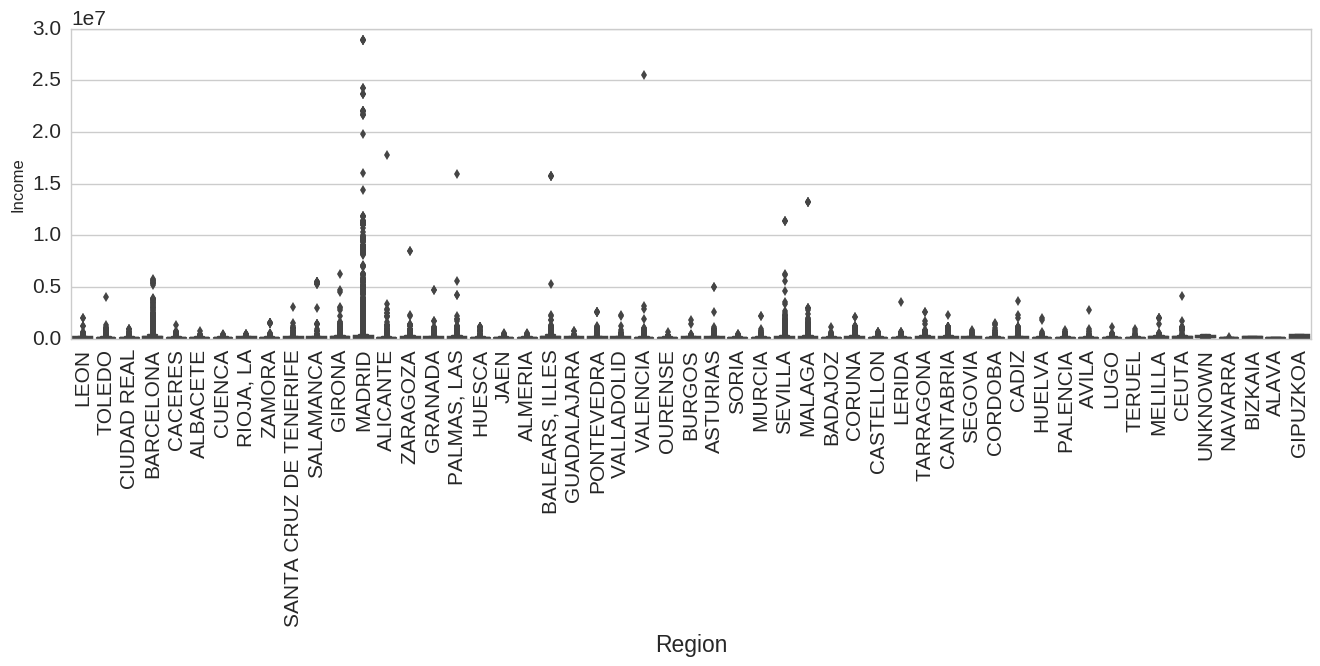

In [85]:
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(16,4))
    sns.set_style("whitegrid")
    sns.boxplot(x="nomprov", y="renta", data=df[df['renta'].notnull()])
    plt.xlabel("Region")
    plt.xticks(rotation='vertical')
    plt.ylabel('Income', fontsize=12)

Display income per region, employee index, segment, gender

In [86]:
incomes_gb = df[df['renta'].notnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])

In [87]:
incomes_stats = incomes_gb.agg({"renta":{"count": size, "median":median, "mean": mean, "std": std, "min": min, "max": max}})
incomes_stats.sort_values(by=("renta","median"),inplace=True)

In [88]:
incomes_stats.loc['MADRID']

renta                            \
                                            count            std        min   
ind_empleado segmento           sexo                                          
S            02 - PARTICULARES  H             1.0            NaN   87798.24   
N            02 - PARTICULARES  UNKNOWN       3.0   82626.279999   89991.42   
                                V        110270.0  327150.512736   12854.04   
             03 - UNIVERSITARIO H         23143.0  347977.385479    3796.86   
             02 - PARTICULARES  H         81879.0  363968.653630    3796.86   
A            02 - PARTICULARES  H            60.0   75781.245413   67261.98   
N            03 - UNIVERSITARIO V         19288.0  324470.127496    5163.75   
F            01 - TOP           H            13.0  106776.950255   44353.17   
             02 - PARTICULARES  H            56.0   70626.883299   36015.60   
A            01 - TOP           H            22.0   75742.833684   46730.31   
N            UNKNOWN            V           607.0  132579.528182   34397.94   
A            02 - PARTICULARES  V            30.0  104786.540027   54742.41   
N            UNKNOWN            H           460.0  211522.818007   35362.08   
B            UNKNOWN            H             1.0            NaN  154092.24   
F            02 - PARTICULARES  V            46.0  129092.387305   42831.69   
N            01 - TOP           V         11528.0  301635.072100    3796.86   
                                H          7440.0  269222.649097   21921.27   
B            02 - PARTICULARES  V            59.0   98175.508902   44560.92   
                                H            81.0  135148.263290   18185.58   
A            01 - TOP           V            13.0   66775.621090   63729.33   
B            01 - TOP           V            14.0   90936.548478   36034.77   
F            01 - TOP           V            17.0  114697.180364   77310.99   
B            01 - TOP           H            19.0  190107.579042   87444.96   

                                                                  \
                                                 max      median   
ind_empleado segmento           sexo                               
S            02 - PARTICULARES  H           87798.24   87798.240   
N            02 - PARTICULARES  UNKNOWN    239719.71  104296.620   
                                V        28894395.51  134852.430   
             03 - UNIVERSITARIO H        24253236.93  134854.110   
             02 - PARTICULARES  H        28894395.51  136353.090   
A            02 - PARTICULARES  H          462806.76  141818.535   
N            03 - UNIVERSITARIO V        28894395.51  142966.320   
F            01 - TOP           H          430477.41  143215.290   
             02 - PARTICULARES  H          357297.66  144884.520   
A            01 - TOP           H          326467.83  147637.695   
N            UNKNOWN            V         1484823.99  148421.340   
A            02 - PARTICULARES  V          632662.26  148797.270   
N            UNKNOWN            H         2693433.69  150652.305   
B            UNKNOWN            H          154092.24  154092.240   
F            02 - PARTICULARES  V          894900.18  158349.960   
N            01 - TOP           V        19849331.97  161222.925   
                                H        11139895.56  163463.955   
B            02 - PARTICULARES  V          493081.80  164164.320   
                                H          771167.16  179536.440   
A            01 - TOP           V          281757.72  179785.680   
B            01 - TOP           V          377353.11  217463.295   
F            01 - TOP           V          513379.29  219023.400   
B            01 - TOP           H          784577.49  230408.250   

                                                        
                                                  mean  
ind_empleado segmento           sexo                    
S            02 - PARTICULARES  H         87798.2

Analyze those who do not declare their incomes

In [89]:
print ((df['renta'].isnull()) & (df['nomprov'] == "MADRID")).sum(), ((df['renta'].notnull()) & (df['nomprov'] == "MADRID")).sum()

36666 255050


In [90]:
nan_incomes_gb = df[df['renta'].isnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])

In [91]:
nan_incomes_stats = nan_incomes_gb.agg('size')

In [92]:
nan_incomes_stats.loc['ALAVA']

ind_empleado  segmento            sexo
N             01 - TOP            H         44
                                  V        107
              02 - PARTICULARES   H        680
                                  V       1252
              03 - UNIVERSITARIO  H        211
                                  V        142
              UNKNOWN             H         23
                                  V         31
dtype: int64

Fill `renta` nan -> median per region, employee index, segment, gender if not defined replace by -99

In [93]:
incomes_gb = df[df['renta'].notnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])
incomes_stats = incomes_gb.agg("median")
nan_incomes_gb = df[df['renta'].isnull()].groupby(['nomprov', 'ind_empleado', 'segmento', 'sexo'])
nan_incomes_stats = nan_incomes_gb.agg("size")

In [94]:
for key, group_value in nan_incomes_gb:
    if key in incomes_stats.index:
        df.loc[group_value.index, 'renta'] = incomes_stats.loc[key]['renta']
#         print "Set value : ", incomes_stats.loc[key]['renta']
    else:
#         print "Key is not found : ", key, "Count = ", nan_incomes_stats.loc[key]
#         print "Set invalid value : -99"
        df.loc[group_value.index, 'renta'] = -99
    

In [95]:
print df['renta'].isnull().sum(), len(df['renta'].unique())

0 520207


In [96]:
df.isnull().any().sum()

2

In [97]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                    False
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [98]:
df['indrel_1mes'].unique()

array(['1', 'P', '1.0', nan, '2.0', '3', '3.0', '4.0', 1.0, 2.0, 3.0, '2',
       4.0, '4'], dtype=object)

In [99]:
df['indrel_1mes'].fillna('UNKNOWN', inplace=True)

In [100]:
df['indrel_1mes'].value_counts()

1.0        360734
1.0        332423
1          198208
UNKNOWN     14007
3.0           186
3.0           178
3             118
P              79
2.0            50
2              48
2.0            40
4.0            15
4.0            10
4               7
Name: indrel_1mes, dtype: int64

In [101]:
df['indrel_1mes'] = df['indrel_1mes'].astype(str).str.replace('.0', '')

In [102]:
df['indrel_1mes'].value_counts()

1          891365
UNKNOWN     14007
3             482
2             138
P              79
4              32
Name: indrel_1mes, dtype: int64

In [129]:
df['antiguedad'] = pd.to_numeric(df['antiguedad'],errors="coerce")
np.sum(df["antiguedad"].isnull())

0

In [ ]:
#df.loc[df.antiguedad.isnull(),"antiguedad"] = df.antiguedad.min()
#df.loc[df.antiguedad <0] = 0

In [137]:
df['antiguedad'].unique()

array([      4,      17,       0,       3,       1,       2,      12,
           140,     183,      81,     120,     132,     139,     131,
           137,     118,     141,     127,     126,      99,      57,
            74,     123,     101,     119,     135,     124,      23,
           156,     136,      13,     133,     121,     143,     128,
            96,     138,     125,      86,      68,     134,       8,
           102,     169,      16,      75,     113,      56,      25,
             7,      10,      64,      37,      84,      21,      45,
           116,      97,      98,      50,      85,      82,      31,
           104,     100,      20,     117,      83,      46,     130,
            87,      65,     103,      28,     107,      14,      60,
            92,     210,     129,      73,      66,     218,     106,
            44,     211,      11,      27,     199,     165,     108,
            58,      55,       6,      93,      88,     115,      15,
            18,     

In [130]:
mask = df['antiguedad'] < 0
mask.sum()

2

In [138]:
df[df['antiguedad'] == 248][['fecha_alta', 'fecha_dato', 'antiguedad', 'age']]

,fecha_alta,fecha_dato,antiguedad,age
243279,1995-01-16,2015-11-28,248,51
243577,1995-04-04,2015-11-28,248,49
243578,1995-04-04,2015-11-28,248,47
243580,1995-04-04,2015-11-28,248,71
243581,1995-04-04,2015-11-28,248,68
243583,1998-04-21,2015-11-28,248,56
243584,1995-04-03,2015-11-28,248,56
243586,1995-04-01,2015-11-28,248,47
243589,1995-04-01,2015-11-28,248,46
243593,1995-03-31,2015-11-28,248,55


In [103]:
df['indrel'].unique()

array([ 1, 99])

In [104]:
df['tiprel_1mes'].unique()

array(['A', 'I', 'R', nan, 'P'], dtype=object)

In [105]:
df['tiprel_1mes'].fillna('UNKNOWN', inplace=True)

In [106]:
df['tiprel_1mes'].value_counts()

I          494038
A          397465
UNKNOWN     14007
P             514
R              79
Name: tiprel_1mes, dtype: int64

In [107]:
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'])
df['fecha_dato'] = pd.to_datetime(df['fecha_dato'])

In [108]:
((df['indrel_1mes'] == "UNKNOWN") & (df['tiprel_1mes'] == "UNKNOWN") & (df['fecha_dato'].dt.month == df['fecha_alta'].dt.month)).sum()

14006

In [109]:
mask = (df['indrel_1mes'] == "UNKNOWN") & (df['tiprel_1mes'] == "UNKNOWN") & (df['fecha_dato'].dt.month == df['fecha_alta'].dt.month)

In [110]:
df[mask][['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t', 'indrel']].head(10)

,fecha_dato,fecha_alta,ult_fec_cli_1t,indrel
1712,2015-11-28,2015-11-11,2015-11-12,99
3463,2015-11-28,2015-11-30,UNKNOWN,1
45072,2015-11-28,2015-11-15,UNKNOWN,1
134245,2015-11-28,2015-11-11,UNKNOWN,1
136235,2015-11-28,2015-11-16,UNKNOWN,1
151333,2015-11-28,2015-11-17,UNKNOWN,1
206062,2015-11-28,2015-11-13,UNKNOWN,1
291742,2015-11-28,2015-11-06,UNKNOWN,1
291988,2015-11-28,2015-11-06,UNKNOWN,1
301971,2015-11-28,2015-11-19,UNKNOWN,1


In [111]:
#df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
#df.loc[df.age > 90,"age"] = df.loc[(df.age >= 30) & (df.age <= 90),"age"].mean(skipna=True)
df.loc[mask & (df['indrel'] == 1), 'indrel_1mes'] = '1'
df.loc[mask & (df['indrel'] == 99), 'indrel_1mes'] = '3'
df.loc[mask, 'tiprel_1mes'] = 'A'

In [112]:
df['tiprel_1mes'].value_counts()

I          494038
A          411471
P             514
R              79
UNKNOWN         1
Name: tiprel_1mes, dtype: int64

In [113]:
df['indrel_1mes'].value_counts()

1          904967
3             886
2             138
P              79
4              32
UNKNOWN         1
Name: indrel_1mes, dtype: int64

In [114]:
df.isnull().any().sum()

0

In [117]:
df['logrenta'] = np.log(df[df['renta'] > 0]['renta'] + 1)

In [120]:
df.loc[df['logrenta'].isnull(), 'logrenta'] = -99

In [128]:
full_stats = df.describe()
full_stats

,ncodpers,age,ind_nuevo,antiguedad,indrel,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta
count,9.061030e+05,906103.000000,906103.00000,906103.000000,906103.000000,906103.000000,9.061030e+05,906103.000000,906103.000000,906103.000000,...,906103.000000,906103.000000,906103.000000,906103.000000,906103.000000,906103.000000,906103.000000,906103.000000,906103.000000,906103.000000
mean,8.602711e+05,39.492091,0.11066,74.209649,1.195112,0.421301,1.257928e+05,0.000089,0.000020,0.608978,...,0.008066,0.002226,0.047689,0.040025,0.022930,0.003374,0.049617,0.054329,0.115869,10.585827
std,4.396582e+05,16.517070,0.31371,1487.295815,4.368406,0.493768,2.067982e+05,0.009454,0.004457,0.487980,...,0.089450,0.047128,0.213107,0.196019,0.149681,0.057986,0.217152,0.226667,0.320068,10.259563
min,1.588900e+04,18.000000,0.00000,-999999.000000,1.000000,0.000000,-9.900000e+01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000
25%,4.715475e+05,24.000000,0.00000,21.000000,1.000000,0.000000,6.950172e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.149121
50%,9.512530e+05,38.000000,0.00000,49.000000,1.000000,0.000000,9.771036e+04,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.489773
75%,1.233788e+06,50.000000,0.00000,131.000000,1.000000,1.000000,1.405830e+05,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.853561
max,1.511973e+06,90.000000,1.00000,250.000000,99.000000,1.000000,2.889440e+07,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.179158


In [126]:
unique_ids   = pd.Series(df["ncodpers"].unique())
limit_people = 10000
unique_id    = unique_ids.sample(n=limit_people)
reduced_df = df[df.ncodpers.isin(unique_id)]
reduced_stats = reduced_df.describe()
reduced_stats

,ncodpers,age,ind_nuevo,antiguedad,indrel,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.0,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.704294e+05,39.260800,0.113100,75.093400,1.156800,0.421000,1.254234e+05,0.000200,0.0,0.613300,...,0.007800,0.001500,0.04380,0.037700,0.019500,0.003000,0.050000,0.055300,0.113100,10.638204
std,4.375874e+05,16.641883,0.316731,66.534764,3.917059,0.493744,2.302994e+05,0.014141,0.0,0.487018,...,0.087977,0.038703,0.20466,0.190479,0.138281,0.054693,0.217956,0.228576,0.316731,9.924976
min,1.599500e+04,18.000000,0.000000,0.000000,1.000000,0.000000,-9.900000e+01,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.000000
25%,4.867568e+05,24.000000,0.000000,21.000000,1.000000,0.000000,6.934904e+04,0.000000,0.0,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.146922
50%,9.625190e+05,37.000000,0.000000,48.000000,1.000000,0.000000,9.706968e+04,0.000000,0.0,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.483195
75%,1.235262e+06,50.000000,0.000000,129.000000,1.000000,1.000000,1.390603e+05,0.000000,0.0,1.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.842670
max,1.511492e+06,90.000000,1.000000,250.000000,99.000000,1.000000,1.326862e+07,1.000000,0.0,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.400913


In [127]:
res = np.abs(full_stats - reduced_stats).drop(['count', '25%', '50%', '75%']).drop(['ncodpers', 'renta'], axis=1)
print np.sum(res, axis=1)
print np.sum(np.sum(res, axis=1))
res

mean         1.245209
std       1421.782061
min     999999.000000
max          1.778246
dtype: float64
1001423.80552


,age,ind_nuevo,antiguedad,indrel,ind_actividad_cliente,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,logrenta
mean,0.231291,0.002440,0.883751,0.038312,0.000301,0.000111,0.000020,0.004322,0.000248,0.002135,...,0.000266,0.000726,0.003889,0.002325,0.00343,0.000374,0.000383,0.000971,0.002769,0.052377
std,0.124813,0.003021,1420.761051,0.451348,0.000024,0.004687,0.004457,0.000961,0.005729,0.003446,...,0.001473,0.008425,0.008447,0.005539,0.01140,0.003294,0.000804,0.001910,0.003337,0.334587
min,0.000000,0.000000,999999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.778246


In [123]:
unique_ids   = pd.Series(train_month["ncodpers"].unique())
limit_people = 50000

counter = 100
found = False
tol = 0.1
while counter > 0 and not found:
    counter -= 1
    unique_id = unique_ids.sample(n=limit_people)
    reduced_train_month = train_month[train_month.ncodpers.isin(unique_id)]
    month_reduced_stats = reduced_train_month.describe()
    err = np.abs(month_full_stats - month_reduced_stats).drop(['count', '25%', '50%', '75%']).drop(['ncodpers', 'renta'], axis=1)
    q = np.sum(np.sum(err, axis=1))
    print "counter : ", counter, " err = ", q
    if q < tol:
        found = True
    
assert found, "Failed to reduce"

month_reduced_stats

counter :  99  err =  1001512.20103
counter :  98  err =  1001512.08385
counter :  97  err =  1001512.15738
counter :  96  err =  1001512.36711
counter :  95  err =  1001513.11963
counter :  94  err =  1001511.8682
counter :  93  err =  1001512.78152
counter :  92  err =  1001512.78701
counter :  91  err =  1001511.76676
counter :  90  err =  3093.74235283
counter :  89  err =  1001511.67383
counter :  88  err =  1001511.83236
counter :  87  err =  1001512.47843
counter :  86  err =  1001512.38606
counter :  85  err =  1001513.14778
counter :  84  err =  1001513.17638
counter :  83  err =  1001512.10869
counter :  82  err =  1001513.33904
counter :  81  err =  1001512.02603
counter :  80  err =  1001513.3544
counter :  79  err =  1001511.72122
counter :  78  err =  1001512.17708
counter :  77  err =  1001511.97592
counter :  76  err =  1001512.21311
counter :  75  err =  1001512.8229
counter :  74  err =  1001511.92277
counter :  73  err =  1001512.85702
counter :  72  err =  1001511.7

KeyboardInterrupt: 

In [ ]:
renta = np.log(train_month['renta'] + 1)
renta.hist(bins=1000)

In [ ]:
renta = np.log(reduced_train_month['renta'] + 1)
renta.hist(bins=1000)